In [69]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [70]:
#Funcion para crear el kernel gaussiano y su transformada
def create_gauss_filter(h, w, k_size, sigma):
    k = cv.getGaussianKernel(h, sigma) @ cv.getGaussianKernel(w, sigma).T
    k /= k.sum()
    k_f = np.fft.fft2(k)
    #k_f = np.fft.fftshift(k_f)
    #k_f = np.abs(k_f)
                
    return k, k_f

In [71]:
create_gauss_filter(5,5,1,1)

(array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
        [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
        [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
        [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
        [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]]),
 array([[ 1.        +0.00000000e+00j, -0.37650044-2.73543579e-01j,
          0.01272215+3.91547443e-02j,  0.01272215-3.91547443e-02j,
         -0.37650044+2.73543579e-01j],
        [-0.37650044-2.73543579e-01j,  0.06692649+2.05978553e-01j,
          0.00592063-1.82218401e-02j, -0.01550042+1.12617165e-02j,
          0.21657867+0.00000000e+00j],
        [ 0.01272215+3.91547443e-02j,  0.00592063-1.82218401e-02j,
         -0.00137124+9.96264872e-04j,  0.00169495-1.51788304e-18j,
         -0.01550042-1.12617165e-02j],
        [ 0.01272215-3.91547443e-02j, -0.01550042+1.12617165e-02j,
          0.00169495+1.51788304e-18j, -0.00137124-9.96264872e-

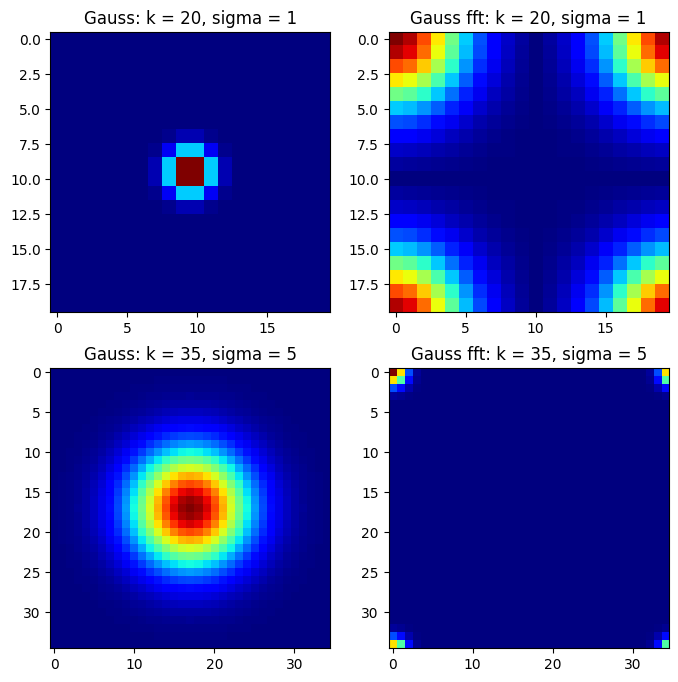

In [72]:
# obtengo el modulo de las transformadas de fourier y grafico
gauss_k_1 = create_gauss_filter(20,20,1,1)[0]
gauss_fft_k_1 = create_gauss_filter(20,20,1,1)[1]
gauss_k_2 = create_gauss_filter(35,35,1,5)[0]
gauss_fft_k_2 = create_gauss_filter(35,35,1,5)[1]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Gauss: k = 20, sigma = 1')
plt.imshow(gauss_k_1, cmap='jet')

plt.subplot(2,2,2)
plt.title('Gauss fft: k = 20, sigma = 1')
plt.imshow(np.abs(gauss_fft_k_1), cmap='jet')

plt.subplot(2,2,3)
plt.title('Gauss: k = 35, sigma = 5')
plt.imshow(gauss_k_2, cmap='jet')

plt.subplot(2,2,4)
plt.title('Gauss fft: k = 35, sigma = 5')
plt.imshow(np.abs(gauss_fft_k_2), cmap='jet')

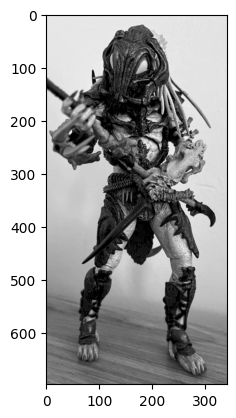

In [73]:
#Levanto la imagen
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img, cmap = 'gray')
plt.show()

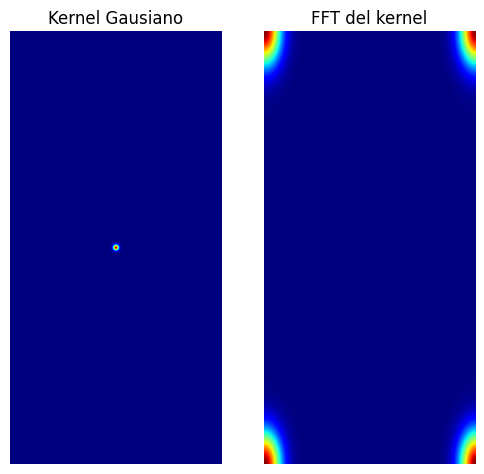

In [74]:
h, w = img.shape
kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=3)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(np.abs(kernel_tf), cmap='jet')

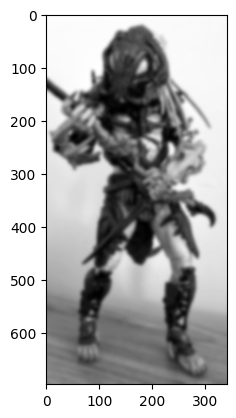

In [75]:
#Aplico filtro gaussiano
img_gauss = cv.filter2D(img, -1, kernel)
plt.figure()
plt.imshow(img_gauss, cmap = 'gray')
plt.show()

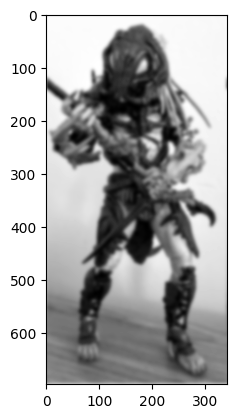

In [101]:
#Aplico filtro gaussiano con fft
img_fft = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
img_fft = np.fft.fft2(img_fft)

img_fft_filtered = img_fft * kernel_tf

img_ifft = np.fft.ifftshift(np.real(np.fft.ifft2(img_fft_filtered)))

plt.figure()
plt.imshow(np.abs(img_ifft), cmap='gray')
plt.show()

In [105]:
#Algoritmo de calidad de imagen
def img_quality_measure(input_img:np.ndarray):
    img_size = input_img.shape
    f = np.fft.fft2(input_img)
    fc = np.fft.fftshift(f)
    #af = 20*np.log(np.abs(fc))
    af = np.abs(fc)
    m = np.max(af)
    thresh = m / 1000
    th = np.count_nonzero(f > thresh)
    fm = th/(img_size[0] * img_size[1])

    return fm

In [112]:
print(img_quality_measure(img))
print(img_quality_measure(img_gauss))
print(img_quality_measure(img_ifft.astype(np.uint8)))

0.010263929618768328
0.0036509843793326555
0.003701400734398239


In [108]:
#Brenner’s focus measure (MIS2)
def brenner_focus_measure(input_img:np.ndarray):
    h, w = input_img.shape
    ret_val = 0
    for index, item in np.ndenumerate(input_img):
        if index[0] < w - 2:
            ret_val = ret_val + (input_img[index[0], index[1]].astype(np.float64) - input_img[index[0] + 2, index[1]].astype(np.float64)) ** 2
    return ret_val


In [109]:
print(brenner_focus_measure(img))
print(brenner_focus_measure(img_gauss))
print(brenner_focus_measure(img_ifft.astype(np.uint8)))

101166228.0
8504191.0
8892313.0


Para las dos metricas ensayadas, el desenfoque obtenido por aplicar el kernel gaussiano en el dominio espacial es mayor al obtenido por hacerlo en el dominio espectral, aunque en ambos casos el resultado es muy similar. Si se ven las imágenes, también se perciben como idénticas. En general, se concluye que no hay ventajas sustanciales en el resultado al aplicar este tipo de desenfoque en el espacio espacial o espectral, sacando las diferencias en la complejidad del algoritmo y del tiempo de cómputo.